# Task 6

## Create reporting for the plastic crates

In this case, I am going to use pandas for cleaning and doing some visualizations with ploty.

Since I have created the transformation for orders. I will use it and transform the DataFrame from Pyspark into a Pandas one.

In [1]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql import types as T
from transformations.transform_orders import transform_orders
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import os

In [4]:

os.path.dirname(os.getcwd())

'/home/facu/Documents/IFCO/data-engineering-test'

In [ ]:
# Create Spark Session.
spark = SparkSession.builder.appName("task6").getOrCreate()

# Read Orders.csv
parent_path = os.path.dirname(os.getcwd())
path = os.path.join(parent_path, 'data-engineering-test/resources/orders.csv')

df_spark = spark.read.csv(path, header=True,sep=";", inferSchema=True)

# Transform the orders into the expected format.
df_orders = transform_orders(df_spark)

In [6]:
df = df_orders.toPandas()
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%y')

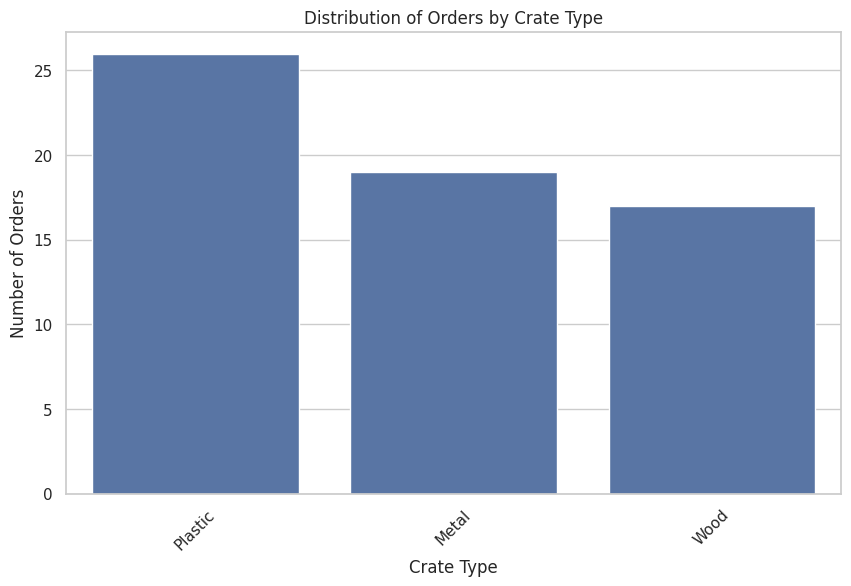

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración de estilo
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='crate_type', order=df['crate_type'].value_counts().index)
plt.title("Distribution of Orders by Crate Type")
plt.xlabel("Crate Type")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.show()


### 2 Item

In [8]:
df_orders = (df_orders
             .withColumn("sales_owners", F.split("salesowners", ","))
)
df_final = df_orders.select("*",
                            F.posexplode(df_orders.sales_owners).alias("sales_position", "sales_owner"))
    

In [9]:
df = df_final.toPandas()
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%y')

In [10]:
# Max date of the orders
max_date = df['date'].max()

# Last 12 months of the orders
limit_date = max_date - timedelta(days=365)

# Filter the Date
df_filter = df[df['date'] >= limit_date]

# Filter by crate_type equals to plastic
df_filter = df_filter[df_filter['crate_type'] == 'Plastic']

In [11]:
# Lets groupby the sales_owner
df2 = df_filter.groupby('sales_owner').count().reset_index()
df2 = df2.rename(columns={"salesowners":"count"})

In [12]:
df2[['sales_owner', 'count']].sort_values(by='count', ascending=True)

,sales_owner,count
0,Ammy Winehouse,1
4,Leon Leonov,1
5,Leonard Cohen,1
8,Marie Curie,1
11,David Goliat,1
12,Leon Leonov,1
14,Luke Skywalker,1
15,Yuri Gagarin,1
2,David Goliat,2
6,Luke Skywalker,2


### 3 Item

In [13]:
# Max date of the orders
max_date = df['date'].max()

# Last 3 months of the orders
limit_date = max_date - pd.offsets.MonthBegin(3)

# Filter the Date
df_filter = df[df['date'] >= limit_date]

# Filter by crate_type equals to plastic
df_filter = df_filter[df_filter['crate_type'] == 'Plastic']

In [14]:
df3 = df_filter.groupby('sales_owner').count().reset_index()
df3 = df3.rename(columns={"salesowners":"count"})

In [15]:
df3[['sales_owner', 'count']].sort_values(by='count', ascending=False).head()

,sales_owner,count
0,Chris Pratt,2
7,Leonard Cohen,2
1,David Goliat,1
2,David Henderson,1
3,Luke Skywalker,1
